In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("fedesoriano/stroke-prediction-dataset")

# print("Path to dataset files:", path)

In [11]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.drop(columns = 'id', inplace = True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [12]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [14]:
# df[df['id'].duplicated()]
# # dengan code diatas, kita temukan bahwa tidak ada data yang duplikat

In [15]:
df[df['bmi'].isnull()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5039,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


<Axes: >

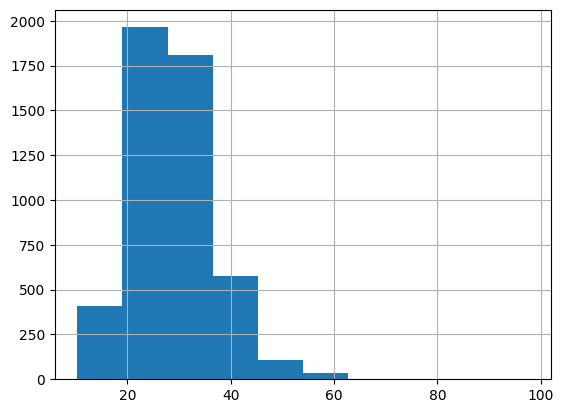

In [16]:
df['bmi'].hist()

In [17]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [18]:
df.describe(include = 'object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [19]:
df['stroke'].value_counts(normalize = True)

stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64

In [20]:
df[df['age'] == df['age'].min()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1614,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
3295,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0


In [21]:
df[df['age'] < 1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
363,Female,0.64,0,0,No,children,Urban,83.82,24.9,Unknown,0
376,Female,0.88,0,0,No,children,Rural,88.11,15.5,Unknown,0
564,Female,0.32,0,0,No,children,Rural,73.71,16.2,Unknown,0
982,Male,0.88,0,0,No,children,Rural,157.57,19.2,Unknown,0
996,Male,0.24,0,0,No,children,Rural,118.87,16.3,Unknown,0
1093,Female,0.32,0,0,No,children,Rural,55.86,16.0,Unknown,0
1206,Female,0.72,0,0,No,children,Urban,66.36,23.0,Unknown,0
1317,Male,0.80,0,0,No,children,Rural,98.67,17.5,Unknown,0
1600,Male,0.40,0,0,No,children,Urban,109.56,14.3,Unknown,0
1614,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0


In [22]:
df[df['age'] > 1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [23]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [24]:
df = df[df['gender'] != 'Other']
df['gender'].value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

In [25]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64

In [26]:
df['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2513
Name: count, dtype: int64

In [27]:
df['work_type'].value_counts()

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [28]:
df.groupby('work_type')['stroke'].value_counts()

work_type      stroke
Govt_job       0          624
               1           33
Never_worked   0           22
Private        0         2775
               1          149
Self-employed  0          754
               1           65
children       0          685
               1            2
Name: count, dtype: int64

In [29]:
df[(df['work_type'] == 'children') & (df['stroke'] == 1)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1
245,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1


In [30]:
df = df[df['work_type'] != 'Never_worked']
df.groupby('work_type')['stroke'].value_counts()

work_type      stroke
Govt_job       0          624
               1           33
Private        0         2775
               1          149
Self-employed  0          754
               1           65
children       0          685
               1            2
Name: count, dtype: int64

In [31]:
df = df[df['work_type'] != 'children']
df.groupby('work_type')['stroke'].value_counts(normalize = True)

work_type      stroke
Govt_job       0         0.949772
               1         0.050228
Private        0         0.949042
               1         0.050958
Self-employed  0         0.920635
               1         0.079365
Name: proportion, dtype: float64

In [32]:
df.groupby('work_type')['stroke'].value_counts()

work_type      stroke
Govt_job       0          624
               1           33
Private        0         2775
               1          149
Self-employed  0          754
               1           65
Name: count, dtype: int64

In [33]:
df.query('work_type == "Govt_job" and stroke == 1').describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,33.000000,33.000000,33.000000,33.000000,28.000000,33.0
mean,66.454545,0.242424,0.212121,136.216970,29.364286,1.0
std,10.228914,0.435194,0.415149,61.135322,5.268791,0.0
min,48.000000,0.000000,0.000000,62.480000,20.200000,1.0
25%,57.000000,0.000000,0.000000,82.810000,27.250000,1.0
50%,66.000000,0.000000,0.000000,110.660000,28.450000,1.0
75%,75.000000,0.000000,0.000000,197.540000,31.100000,1.0
max,82.000000,1.000000,1.000000,263.320000,42.200000,1.0


In [34]:
df.query('work_type == "Govt_job" and stroke == 1')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
11,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
20,Female,71.0,0,0,Yes,Govt_job,Rural,193.94,22.4,smokes,1
34,Male,48.0,0,0,No,Govt_job,Urban,84.20,29.7,never smoked,1
44,Male,60.0,1,0,Yes,Govt_job,Urban,213.03,20.2,smokes,1
54,Female,63.0,0,0,Yes,Govt_job,Urban,197.54,NaN,never smoked,1
59,Female,54.0,1,0,Yes,Govt_job,Urban,180.93,27.7,never smoked,1
70,Female,76.0,0,0,Yes,Govt_job,Rural,62.57,NaN,formerly smoked,1
72,Female,66.0,1,0,Yes,Govt_job,Rural,116.55,31.1,formerly smoked,1
98,Male,57.0,1,0,Yes,Govt_job,Urban,78.92,27.7,formerly smoked,1


<Axes: >

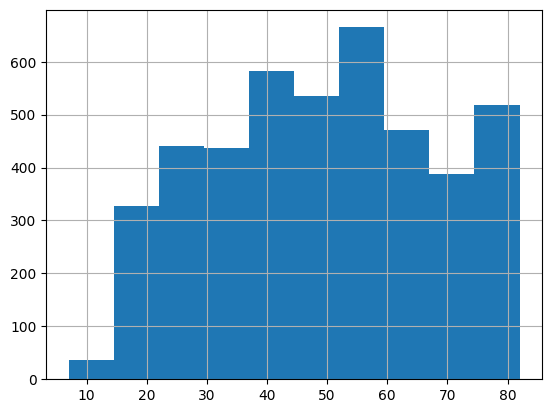

In [35]:
df['age'].hist()

In [36]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [37]:
enc_df = pd.get_dummies(df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']], drop_first=True).astype(int)
enc_df.head()

,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,1,1,0,1,1,0,0
1,0,1,0,1,0,0,1,0
2,1,1,1,0,0,0,1,0
3,0,1,1,0,1,0,0,1
4,0,1,0,1,0,0,1,0


In [38]:
clean_df = pd.concat([df, enc_df], axis=1)
clean_df.drop(columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], inplace = True)
clean_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,1,1,0,1,1,0,0
1,61.0,0,0,202.21,29.1,1,0,1,0,1,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,1,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,1,1,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,29.1,0,0,1,1,0,1,0,1,0
5106,81.0,0,0,125.20,40.0,0,0,1,0,1,1,0,1,0
5107,35.0,0,0,82.99,30.6,0,0,1,0,1,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,1,1,1,0,0,1,0,0
